In [3]:
# Import dependencies
import torch
import torch.nn as nn
from plot_lib import set_default, show_scatterplot#, plot_bases
import matplotlib.pyplot as plt
import random
import numpy as np

In [6]:
# Set up your device 
cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if cuda else "cpu")

In [7]:
# Set up random seed to 1008. Do not change the random seed.
# Yes, these are all necessary when you run experiments!
seed = 1008
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
if cuda:
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True

In [11]:
# Define data generating functions
def quadratic_data_generator(data_size):
    # f(x) = y = x^2 + 4x - 3
    # generate an input tensor of size data_size with torch.randn
    x = torch.randn(data_size, 1) - 2   
    x = x.to(device)
    # TODO
    '''
    y = ...
    '''
    y = x*x + 4*x - 3
    
    
    # placeholder
#    y = torch.ones(data_size,1)
    return x,y

def cubic_data_generator(data_size=100):
    # f(x) = y = x^3 + 4x^2 - 3
    # generate an input tensor of size data_size with torch.randn
    x = torch.randn(data_size, 1) - 2   
    x = x.to(device)
    # TODO
    '''
    y = ...
    '''
    
    y = x*x*x + 4*x*x - 3
    # placeholder
    y = torch.ones(data_size,1)
    return x, y

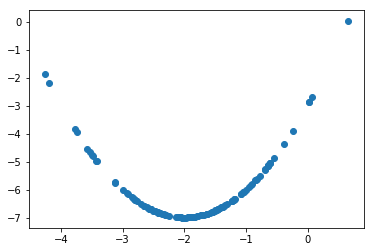

In [21]:
# Generate the data with 128 datapoints
x, y = quadratic_data_generator(128)
plt.scatter(x,y)
plt.show()

In [32]:
# Define a Linear Classifier with a single linear layer and no non-linearity
# (no hidden layer)
class Linear_0H(nn.Module):
    def __init__(self):
#        super().__init__()
        super(baseclass, self).__init__()

        # TODO
#        self.classifer = None
        self.classifer = torch.nn.Linear(1,1)

    def forward(self, x):
        return self.classifier(x)

In [33]:
# Define a Linear Classifier with a single hidden layer of size 5 and ReLU non-linearity
class Linear_1H(nn.Module):
    def __init__(self):
#        super().__init__()
        super(baseclass, self).__init__()

        # TODO
#        self.classifer = None
        self.classifer1 = torch.nn.Linear(1,5)
        self.classifer2 = torch.nn.Linear(5,1)

    def forward(self, x):
#        return self.classifier(x)
        return nn.functional.relu(self.classifier2(nn.functional.relu(self.classifier1(x))))

In [34]:
# Define a Linear Classifier with a two hidden layers of size 5 and ReLU non-linearity
class Linear_2H(nn.Module):
    def __init__(self):
#        super().__init__()
        super(baseclass, self).__init__()

        # TODO
#        self.classifer = None
        self.classifer1 = torch.nn.Linear(1,5)
        self.classifer2 = torch.nn.Linear(5,5)
        self.classifer3 = torch.nn.Linear(5,1)

    def forward(self, x):
#        return self.classifier(x)
        return nn.functional.relu(self.classifier3(nn.functional.relu(self.classifier2(nn.functional.relu(self.classifier1(x))))))

In [30]:
'''
TODO: Training function

Hint: look at some example pytorch tutorials to learn how to
    - initialize optimizers
    - zero gradient
    - backprop the loss
    - step the gradient


Note: This is full batch. We compute forward on whole x,y.
No need for dataloaders nor loop over batches. 
Just pass all of x to model's forward pass.
'''
def train(model, epochs, x, y):
    
    # Set model to training mode
    model.train()
    
    # Define MSE loss function
#    criterion = None
    criterion = nn.MSELoss()
    
    # TODO: Define the SGD optimizer with learning rate 0.01
#    optimizer = None
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01, weight_decay=lambda_l2)
    
    for epoch in range(epochs):
        
        # TODO: Forward data through model to predict y
#        y_pred = None
        y_pred = model(x)
        
        # TODO: Compute loss in terms of predicted and true y
#        loss = None
        loss = criterion(y_pred, y)

        # TODO: Zero gradient
        optimizer.zero_grad()
        
        # TODO: call backward on loss
        loss.backward()
        
        # TODO: step the optimizer
        optimizer.step()
        
        # every 100 epochs, print
        if (epoch+1) % 100 == 0:
            print('Epoch {} loss: {}'.format(epoch+1, loss.item()))
            
    # return y_pred without gradient information, for plotting
    return y_pred.detach()

In [35]:
# 0H model on quadratic data
model = Linear_0H()
y_pred = train(model, epochs=1000, x=x, y=y)

# Plot predictions vs actual data
plt.scatter(x, y)
plt.scatter(x, y_pred)
plt.show()

NameError: global name 'baseclass' is not defined

In [ ]:
# 1H model on quadratic data
model = Linear_1H()
y_pred = train(model, epochs=1000, x=x, y=y)
plt.scatter(x, y)
plt.scatter(x, y_pred)
plt.show()

In [ ]:
# 2H model on quadratic data
model = Linear_2H()
y_pred = train(model, epochs=1000, x=x, y=y)
plt.scatter(x, y)
plt.scatter(x, y_pred)
plt.show()

In [ ]:
# Generate cubic data with 128 data points
x, y = cubic_data_generator(128)

In [ ]:
# 0H model on cubic data
model = Linear_0H()
y_pred = train(model, epochs=1000, x=x, y=y)
plt.scatter(x, y)
plt.scatter(x, y_pred)
plt.show()

In [ ]:
# 1H model on cubic data
model = Linear_1H()
y_pred = train(model, epochs=1000, x=x, y=y)
plt.scatter(x, y)
plt.scatter(x, y_pred)
plt.show()

In [ ]:
# 2H model on cubic data
model = Linear_2H()
y_pred = train(model, epochs=1000, x=x, y=y)
plt.scatter(x, y)
plt.scatter(x, y_pred)
plt.show()